In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
def CallYiNo (S0,K1,r,delta,sigma,T,N,FV,coupon,per):      #k1 lower coupon bound

  md = 1
  bd = np.zeros([md])
  bd = [92/365]


  nd = 6
  cd = np.zeros([nd])
  cd = [182/365,273/365,365/365,456/365,546/365,638/365]

  St = np.zeros([N+1,N+1])
  V = np.zeros([N+1,N+1])
  dt = T/N
  u = np.exp(sigma*np.sqrt(dt))
  d = 1/u
  p = (np.exp((r-delta)*dt)-d)/(u-d)


  imd = [i/dt for i in bd]
  imd1 = [math.floor(i) for i in imd]
  delimd = {}
  for i in range(md):
    delimd[imd1[i]] = dt * (imd[i] - imd1[i])

  id = [i/dt for i in cd]
  id1 = [math.floor(i) for i in id]
  delid = {}
  for i in range(nd):
    delid[id1[i]] = dt * (id[i] - id1[i])

  def Stock(u,d,dt):
    St[0,0] = S0
    for i in range (1,N+1):
          St[i, 0] = St[i-1, 0]*d
          for j in range(1, i+1):
              St[i, j] = St[i-1, j-1]*u

  Stock(u,d,dt)

  def lambda_func1(K1,St):
    Fi_Pr = St[-1,:]
    Fi_Pr = np.sort(Fi_Pr)

    idx = np.searchsorted(Fi_Pr,K1)

    Sk = Fi_Pr[idx]
    Sk_1 = Fi_Pr[idx-1]

    lamb1 = (Sk - K1)/(Sk - Sk_1)

    return(lamb1)



  lambd1 = lambda_func1(K1,St)


  i = N
  for j in range (0,N+1):
    if St[i,j]>=K1:
      V[i,j] = FV + (FV * coupon / per)
    else:
      V[i,j] = FV * (St[i,j] /S0)


  for i in range (N-1,-1,-1):
    for j in range (0,i+1):
      V[i,j] = np.exp(-r*dt)*(V[i+1,j+1]*p + V[i+1,j]*(1-p))
      if i in id1:

          cv = np.exp(-r*dt)*( V[i+1,j+1]*p + V[i+1,j]*(1-p) )
          call = np.exp(-delid[i]*r) * FV
          V[i,j] = np.minimum(cv,call)
          if (St[i,j]>=K1):
            V[i,j] = V[i,j] + np.exp(-delid[i]*r) *  (FV * coupon / per)

      if i in imd1:

         if St[i,j] >= K1:
          V[i,j] = np.exp(-r*dt)*( V[i+1,j+1]*p + V[i+1,j]*(1-p) ) + np.exp(-delimd[i]*r) *  (FV * coupon / per)

  output = {'num_steps': N, 'Value': V[0,0], 'LambdaK1':lambd1 }

  return output


In [21]:
CallYiNo(169.96,110.47,0.040653,0.01109,0.3546,2,10045,1000,0.1165,4)

{'num_steps': 10045,
 'Value': 971.5133334049818,
 'LambdaK1': 0.5525324831336504}

N = 50, Note Price = 981.79618509, Lambda = 0.02799746
N = 60, Note Price = 975.64198148, Lambda = 0.32905860
N = 70, Note Price = 971.88195320, Lambda = 0.59513417
N = 80, Note Price = 966.75107108, Lambda = 0.83570453
N = 90, Note Price = 979.07028105, Lambda = 0.06303531
N = 100, Note Price = 974.99222158, Lambda = 0.28979796
N = 110, Note Price = 968.61915555, Lambda = 0.50045658
N = 120, Note Price = 968.67599313, Lambda = 0.69786011
N = 130, Note Price = 965.63635403, Lambda = 0.88413018
N = 140, Note Price = 978.74674246, Lambda = 0.06627867
N = 150, Note Price = 973.51858778, Lambda = 0.24899858
N = 160, Note Price = 970.07051259, Lambda = 0.42297786
N = 170, Note Price = 971.27546103, Lambda = 0.58929595
N = 180, Note Price = 967.92225683, Lambda = 0.74883460
N = 190, Note Price = 965.81962921, Lambda = 0.90232393
N = 200, Note Price = 977.43939420, Lambda = 0.05407811
N = 210, Note Price = 974.25789266, Lambda = 0.20737535
N = 220, Note Price = 972.71679315, Lambda = 0.355401

<Figure size 1000x600 with 0 Axes>

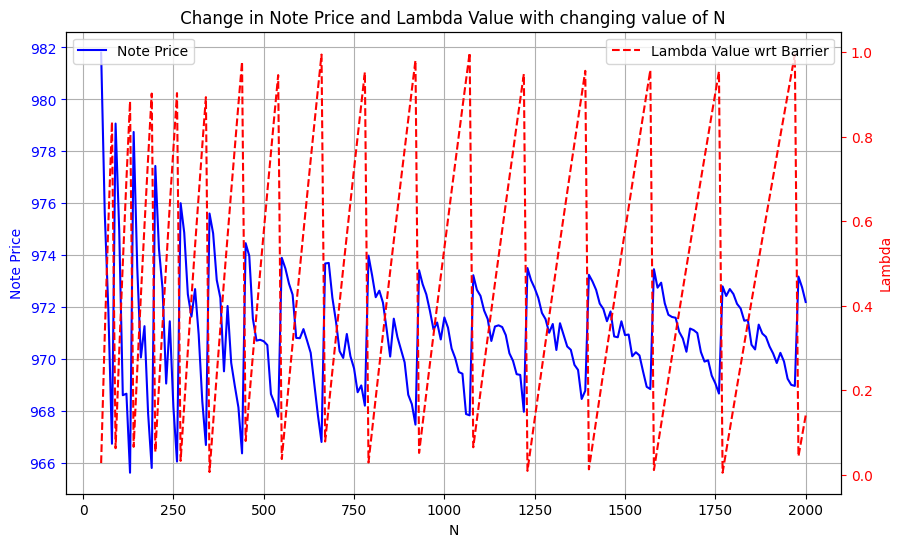

In [12]:
N_Val = np.arange(50,2001,10)
Note_val = []
Lambda_Val =[]

for N in N_Val:
  note = CallYiNo(169.69,110.47,0.040653,0.01109,0.3546,2,N,1000,0.1165,4)['Value']
  Note_val.append(note)
  lamd = CallYiNo(169.69,110.47,0.040653,0.01109,0.3546,2,N,1000,0.1165,4)['LambdaK1']
  Lambda_Val.append(lamd)

for i in range(len(N_Val)):
  print(f"N = {N_Val[i]}, Note Price = {Note_val[i]:.8f}, Lambda = {Lambda_Val[i]:.8f}")

plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(N_Val, Note_val, 'b-', label='Note Price')
ax1.set_xlabel('N')
ax1.set_ylabel('Note Price', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(N_Val, Lambda_Val, 'r--', label='Lambda Value wrt Barrier')
ax2.set_ylabel('Lambda', color='r')
ax2.tick_params('y', colors='r')
plt.title(" Change in Note Price and Lambda Value with changing value of N ")
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Sigma_S0 = 0.3902, Note Price = 948.76501478
Sigma_S0 = 0.3718, Note Price = 960.44572333
Sigma_S0 = 0.3715, Note Price = 960.54589447
Sigma_S0 = 0.3637, Note Price = 965.61770879
Sigma_S0 = 0.3647, Note Price = 965.29259647
Sigma_S0 = 0.3613, Note Price = 967.01465459
Sigma_S0 = 0.3583, Note Price = 967.98746767
Sigma_S0 = 0.3546, Note Price = 970.92435430
Sigma_65S0 = 0.4925, Note Price = 882.51447153
Sigma_65S0 = 0.4325, Note Price = 921.79108555
Sigma_65S0 = 0.416, Note Price = 933.53477472
Sigma_65S0 = 0.4127, Note Price = 934.77298604
Sigma_65S0 = 0.4032, Note Price = 941.24420467
Sigma_65S0 = 0.3908, Note Price = 948.55237741
Sigma_65S0 = 0.3836, Note Price = 953.80461603
Sigma_65S0 = 0.3754, Note Price = 959.23510209


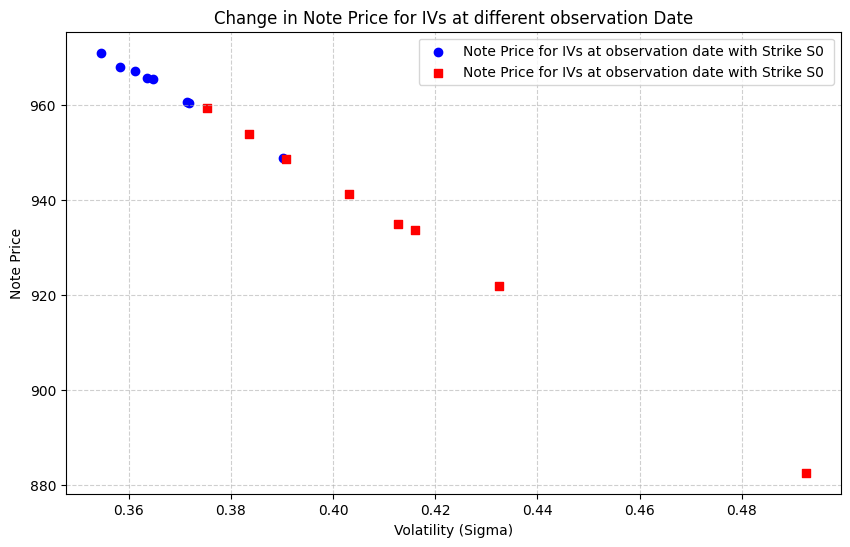

In [23]:
V_Sigma_S0 = [0.3902,0.3718,0.3715,0.3637,0.3647,0.3613,0.3583,0.3546]
V_Sigma_65S0 = [0.4925,0.4325,0.4160,0.4127,0.4032,0.3908,0.3836,0.3754]

Note_ValS0 = []
Note_Val65S0 = []

for sigma in V_Sigma_S0:
  note = CallYiNo(169.69,110.47,0.040653,0.01109,sigma,2,10045,1000,0.1165,4)['Value']
  Note_ValS0.append(note)

for sigma in V_Sigma_65S0:
  note = CallYiNo(169.69,110.47,0.040653,0.01109,sigma,2,10045,1000,0.1165,4)['Value']
  Note_Val65S0.append(note)

for i in range(len(V_Sigma_S0)):
  print(f"Sigma_S0 = {V_Sigma_S0[i]}, Note Price = {Note_ValS0[i]:.8f}")

for i in range(len(V_Sigma_65S0)):
  print(f"Sigma_65S0 = {V_Sigma_65S0[i]}, Note Price = {Note_Val65S0[i]:.8f}")

plt.figure(figsize=(10,6))
plt.scatter(V_Sigma_S0, Note_ValS0, color='b', label='Note Price for IVs at observation date with Strike S0 ', marker='o')
plt.scatter(V_Sigma_65S0, Note_Val65S0, color='r', label='Note Price for IVs at observation date with Strike S0', marker='s')

plt.xlabel('Volatility (Sigma)')
plt.ylabel('Note Price')
plt.title('Change in Note Price for IVs at different observation Date')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


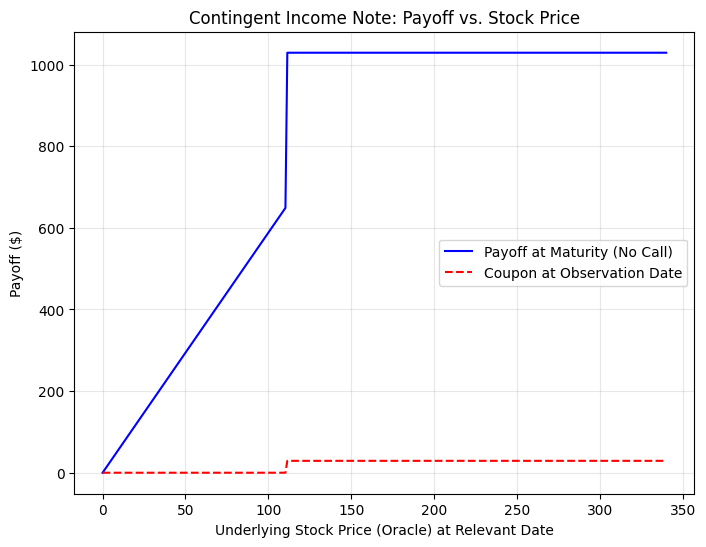

In [24]:
import numpy as np
import matplotlib.pyplot as plt
S0 = 169.96
barrier_percent = 0.65
K1 = barrier_percent * S0
FV = 1000
annual_coupon_rate = 0.1165
quarterly_rate = annual_coupon_rate / 4
coupon_amt = FV * quarterly_rate
def payoff_at_maturity(S):

    payoff = np.where(S >= K1,
                      FV + coupon_amt,
                      FV * (S / S0))
    return payoff
def payoff_coupon_observation(S):
    payoff_coupon = np.where(S >= K1,
                             coupon_amt,
                             0.0)
    return payoff_coupon
S_range = np.linspace(0, 2 * S0, 300)
final_payoffs = payoff_at_maturity(S_range)
coupon_payoffs = payoff_coupon_observation(S_range)
plt.figure(figsize=(8, 6))
plt.plot(S_range, final_payoffs, label='Payoff at Maturity (No Call)', color='blue')
plt.plot(S_range, coupon_payoffs, label='Coupon at Observation Date', color='red', linestyle='--')
plt.title("Contingent Income Note: Payoff vs. Stock Price")
plt.xlabel("Underlying Stock Price (Oracle) at Relevant Date")
plt.ylabel("Payoff ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()